<a href="https://colab.research.google.com/github/QUADRIABUBAKAR/ACCESS-Data-science-assignment/blob/main/Week_4/Week_4_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
from google.colab import drive
drive.mount('/content/drive')
# load the dataset
housing_data = pd.read_csv('/content/drive/MyDrive/housing.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Initial Data Inspection

Check shape, columns, data types

Identify missing values (if any)

In [5]:
#head(): first 10 rows of this dataset#
# The first ten items
housing_data.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
#tail(): first 3 rows of this dataset, there is nothing unusual
housing_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
# Shape of the data
housing_data.shape

(20640, 10)

In [12]:
housing_data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Data Cleaning

Handle missing values appropriately (if any)

Fix incorrect data types

Remove duplicates (if any)

In [13]:
# Drop the missing values, due to the fact that we cant just put average of properties
housing_data.dropna(subset=['total_bedrooms'], inplace=True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [14]:
#CHECK FOR DUPLICATES
housing_data.duplicated().sum()

np.int64(0)

In [15]:
for column in housing_data.columns:
    unique_values = housing_data[column].unique()
    print(f"Unique values for column '{column}':\n{unique_values}\n")
    print(f"Number of unique values: {len(unique_values)}\n--------------------------------------------------")

Unique values for column 'longitude':
[-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.67
 -120.9  -120.91 

In [16]:
#MAKING THE MEDIAN INCOME FROM 10THOUSAND TO JUST UNITS
housing_data['median_income'] = housing_data['median_income'] * 10000
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,INLAND


Visualizations

Text(0, 0.5, 'Count')

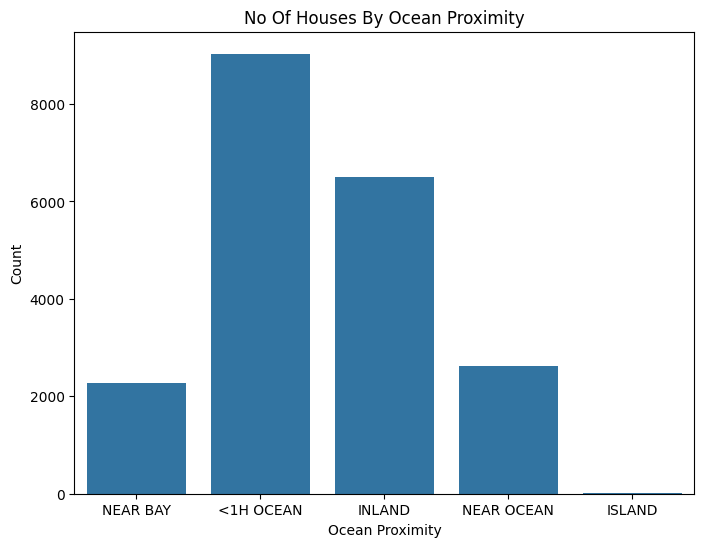

In [37]:
#Univariate Analysis
#for "ocean_proximity" how close to the ocean
# Distribution of Ocean Proximity
plt.figure(figsize=(8,6))
sns.countplot(x='ocean_proximity', data=housing_data)
plt.title('No Of Houses By Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')




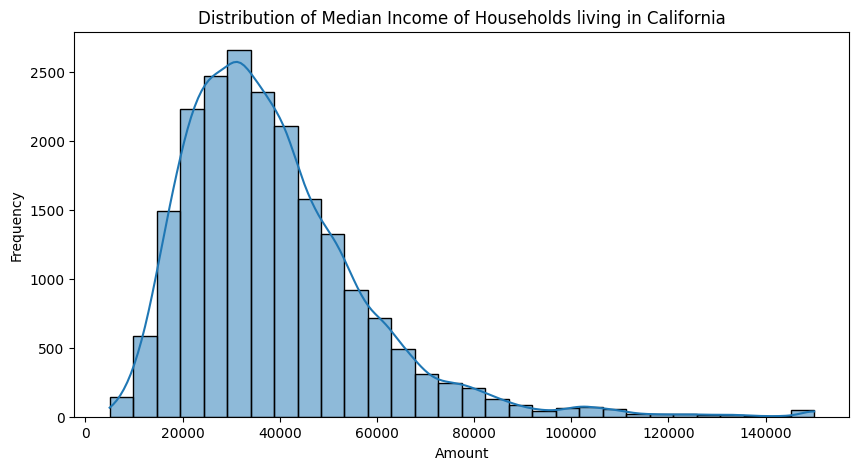

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(housing_data["median_income"], bins = 30, kde = True)
plt.title("Distribution of Median Income of Households living in California")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show();

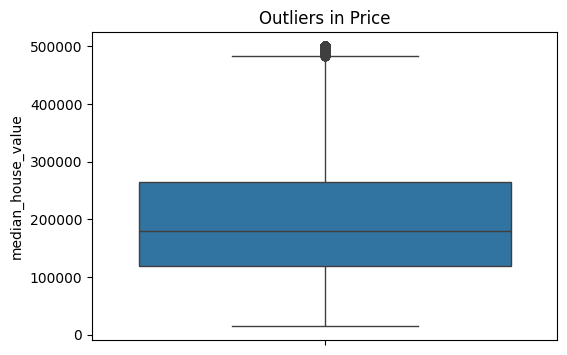

In [48]:
#Outlier Identification
plt.figure(figsize=(6,4))
sns.boxplot(housing_data["median_house_value"])
plt.title("Outliers in Price")
plt.show()



In [30]:
fig = px.scatter_mapbox(
    housing_data,  # Our DataFrame
    lat="latitude",
    lon="longitude",
    center={"lat": 36.778259, "lon": -119.417931},  # Map will be centered on California
    zoom=5.5, # Added zoom level for better initial navigation
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["median_house_value", "ocean_proximity", "median_income"],  # Display price and income when hovering mouse over house
    title="California Housing Prices by Location" # Added title for the map
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

Bivariate Analysis

Multivariate analysis

Text(0.5, 1.0, 'Correlation Analysis of the Numerical Columns')

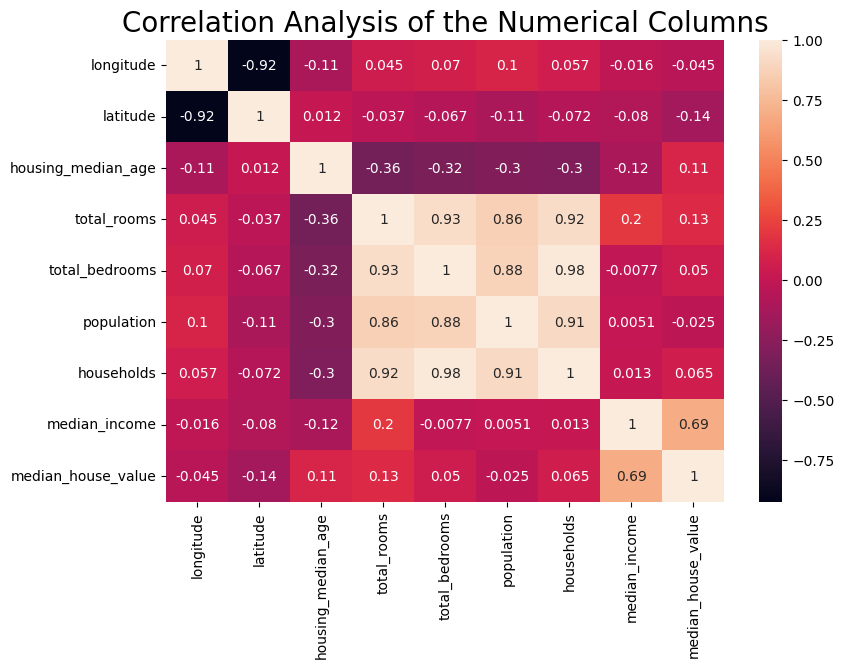

In [39]:
# Correlation Analysis of Numerical Columns
numeric_corr = housing_data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(9,6))
sns.heatmap(numeric_corr, annot=True)
plt.title('Correlation Analysis of the Numerical Columns', fontsize=20)